In [2]:
from features.feature_constructor import Feature
from features.violence_calls import ViolenceCalls
from features.population import Population
from detroit_geos import get_detroit_census_blocks

# Framework
`help(Feature)` gives a reasonable docstring, but may be easier to just look at the code, which contains descriptions of every method

We'll concentrate on using a child class - population

In [2]:
# The Population class contains reference information for the data set
# Instantiating the object does not load the data by default
population = Population(year=2020, data_path = '.', population_data_path='population', verbose=True)

In [3]:
# loading the data is not a raw load, it contains transforms that we well always want, like column selection and renaming
population.load_data()
population.data.head()

Loaded 32022 rows


,block_id,population
0,261635001001000,14
1,261635001001001,100
2,261635001001002,82
3,261635001001003,50
4,261635001001004,66


In [4]:
# This decorated method standardizes block ids and does validation, in addition to any additional cleaning you may want to do
population.cleanse_data()

clean data has 32022 rows
cleansed data validator: block_id looks good


In [5]:
# this decorated method will automatically run the above steps and load data + set the index as necessary if it hasn't be done yet
# It defaults to full data load, so if the data set is large, you may want to load the data with custom arguments instead of doing 
# it automatically

# Outputs a series, which is the goal of this class
block_group_population = population.construct_feature(target_geo_grain='block group')

Generate index not run, or was run on the wrong grain. Creating index on block group grain
0 of 1507 block groups are unaccounted for


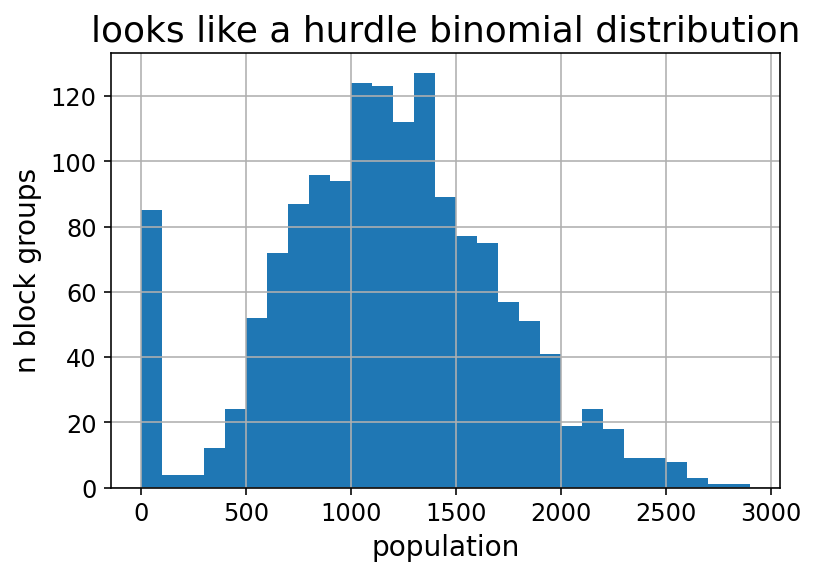

In [6]:
block_group_population.hist(bins=np.arange(0,3000,100))
_ = plt.gca().set(title='looks like a hurdle binomial distribution',xlabel='population',ylabel='n block groups')

In [29]:
from features.feature_constructor import Feature
from features.violence_calls import ViolenceCalls
from features.population import Population
from detroit_geos import get_detroit_census_blocks
from util_detroit import point_to_block_id
import geopandas as gpd

In [60]:
call_feat = ViolenceCalls(decennial_census_year=2010)
call_feat.load_data(use_lat_long=True)
# # call_feat.cleanse_data()
# call_feat.construct_feature(target_geo_grain='block')

Loaded 371,176 rows of data


In [ ]:
call_feat.cleanse_data(

In [27]:
blocks = get_detroit_census_blocks(2010)

In [32]:
t = gpd.sjoin(call_feat.data, blocks, how="left", predicate="within")

In [34]:
blocks.loc[blocks.block_id == t.block_id_right.iloc[0]]

,block_id,longitude,latitude,geometry
12604,261635458001004,-83.218775,42.337904,"POLYGON ((-83.21811 42.33610, -83.21931 42.336..."


In [55]:
t.drop_duplicates(subset=['oid'],keep='first')

,priority,calldescription,category,call_timestamp,officerinitiated,block_id_left,longitude_left,latitude_left,oid,geometry,index_right,block_id_right,longitude_right,latitude_right
0,1,FELONIOUS ASSAULT IP,FA IP,2020-06-25 10:53:47-04:04,No,261635457002005,-83.219314,42.336093,3079341,POINT (-83.21931 42.33609),12604.0,2.616355e+14,-83.218775,42.337904
1,2,ASSAULT AND BATTERY IP-JH,AB IP/JH,2020-06-25 10:56:22-04:04,No,261635361004010,-83.142711,42.409890,3079346,POINT (-83.14271 42.40989),999.0,2.616354e+14,-83.143294,42.411096
2,4,FELONIOUS ASSAULT REPORT,FA RPT,2020-06-25 10:56:58-04:04,Yes,NaN,-84.132207,42.082976,3079351,POINT (-84.13221 42.08298),NaN,NaN,NaN,NaN
3,1,FELONIOUS ASSAULT IP,FA IP,2020-06-25 11:10:09-04:04,No,261635124002004,-82.956673,42.392132,3079387,POINT (-82.95667 42.39213),1553.0,2.616351e+14,-82.957870,42.392761
4,1,SHOOTING/CUTTING/PENT WOUND,GSWCUT,2020-06-25 11:12:11-04:04,No,261635384003001,-83.133122,42.422717,3079399,POINT (-83.13312 42.42272),5136.0,2.616354e+14,-83.132549,42.423618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,1,FELONIOUS ASSAULT IP,FA IP,2020-06-28 23:43:23-04:04,No,261635219002012,-83.076429,42.348090,3089246,POINT (-83.07643 42.34809),1506.0,2.616352e+14,-83.077257,42.348272
769,2,FELONIOUS ASSAULT JH,FA JH,2020-06-28 23:50:34-04:04,No,261635080002004,-83.122495,42.443234,3089262,POINT (-83.12249 42.44323),1821.0,2.616351e+14,-83.115070,42.442397
770,2,ASSAULT AND BATTERY IP-JH,AB IP/JH,2020-06-28 23:51:59-04:04,No,261635014004002,-82.936642,42.416444,3089264,POINT (-82.93664 42.41644),6980.0,2.616350e+14,-82.937263,42.416427
771,1,FELONIOUS ASSAULT IP,FA IP,2020-06-28 23:57:57-04:04,No,261635465001000,-83.236262,42.371899,3089274,POINT (-83.23626 42.37190),6063.0,2.616355e+14,-83.236944,42.372974


<AxesSubplot:>

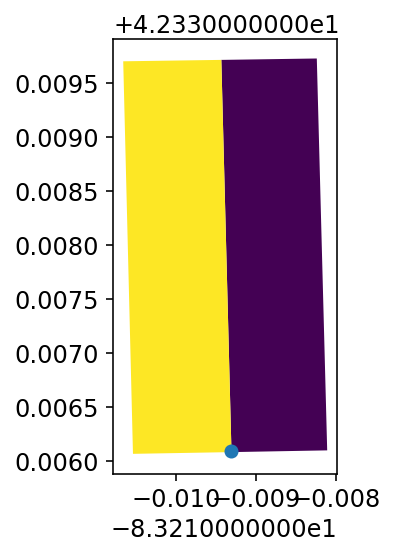

In [52]:
fig, ax = plt.subplots(1,1)
blocks.loc[[12604,15047],:].plot(ax=ax,column='block_id')
call_feat.data.loc[lambda x: x.oid==3079341].plot(ax=ax)

In [47]:
blocks.loc[[12604],:].overlaps(blocks.loc[[15047],:])

/Users/ahakso/.virtualenvs/detroit/lib/python3.8/site-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


12604    False
15047    False
dtype: bool

In [35]:
call_feat.data.loc[lambda x: x.oid==3079341]

,priority,calldescription,category,call_timestamp,officerinitiated,block_id,longitude,latitude,oid,geometry
0,1,FELONIOUS ASSAULT IP,FA IP,2020-06-25 10:53:47-04:04,No,261635457002005,-83.219314,42.336093,3079341,POINT (-83.21931 42.33609)


In [24]:
point_to_block_id(call_feat.data,2010,

,priority,calldescription,category,call_timestamp,officerinitiated,block_id,longitude,latitude,oid,geometry
0,1,FELONIOUS ASSAULT IP,FA IP,2020-06-25 10:53:47-04:04,No,261635457002005,-83.219314,42.336093,3079341,POINT (-83.21931 42.33609)
1,2,ASSAULT AND BATTERY IP-JH,AB IP/JH,2020-06-25 10:56:22-04:04,No,261635361004010,-83.142711,42.409890,3079346,POINT (-83.14271 42.40989)
2,4,FELONIOUS ASSAULT REPORT,FA RPT,2020-06-25 10:56:58-04:04,Yes,NaN,-84.132207,42.082976,3079351,POINT (-84.13221 42.08298)
3,1,FELONIOUS ASSAULT IP,FA IP,2020-06-25 11:10:09-04:04,No,261635124002004,-82.956673,42.392132,3079387,POINT (-82.95667 42.39213)
4,1,SHOOTING/CUTTING/PENT WOUND,GSWCUT,2020-06-25 11:12:11-04:04,No,261635384003001,-83.133122,42.422717,3079399,POINT (-83.13312 42.42272)
...,...,...,...,...,...,...,...,...,...,...
768,1,FELONIOUS ASSAULT IP,FA IP,2020-06-28 23:43:23-04:04,No,261635219002012,-83.076429,42.348090,3089246,POINT (-83.07643 42.34809)
769,2,FELONIOUS ASSAULT JH,FA JH,2020-06-28 23:50:34-04:04,No,261635080002004,-83.122495,42.443234,3089262,POINT (-83.12249 42.44323)
770,2,ASSAULT AND BATTERY IP-JH,AB IP/JH,2020-06-28 23:51:59-04:04,No,261635014004002,-82.936642,42.416444,3089264,POINT (-82.93664 42.41644)
771,1,FELONIOUS ASSAULT IP,FA IP,2020-06-28 23:57:57-04:04,No,261635465001000,-83.236262,42.371899,3089274,POINT (-83.23626 42.37190)


In [16]:
df = pd.DataFrame(np.random.rand(10,10))
df.assign(

In [8]:
call_feat

Violence calls feature

Function metadata:
{'box_url': 'https://bloombergdotorg.box.com/s/pci8u0mqij9kusq1ce9wq2lzjtznap58',
 'feature_name': 'violence_calls',
 'filename': 'calls_for_service_from_jimmy.csv',
 'min_geo_grain': 'lat/long',
 'source_url': 'https://data.detroitmi.gov/datasets/911-calls-for-service/explore'}

Using 2010 as reference geo

773 rows

No data cleaned

No index generated

In [10]:
# without reloading or recleaning the data, you can regenerate a new feature vector on a different grain
call_feat.construct_feature(target_geo_grain='tract')

Data not yet cleansed, cleaning
clean data has 769 rows
cleansed data validator: block_id looks good
Generate index not run, or was run on the wrong grain. Creating index on tract grain


geo
26163500100     5
26163500200     3
26163500300     9
26163500600    10
26163500700     8
               ..
26163573800     2
26163985000     2
26163985100     3
26163985200     2
26163985300     3
Name: violence_calls, Length: 252, dtype: int64

In [ ]:
call_feat.open_data_url('source')